In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_cbd_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBD
0,8,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
1,14,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.001046
2,15,0.341098,0.000528,-0.119240,-0.097021,-0.078687,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0.001046
3,18,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
4,18,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
59996,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
59997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046
59998,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.001046


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..CBD'], axis = 1)
y = df_rf[['X..CBD']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.00104646],
       [0.00104646],
       [0.00104646],
       ...,
       [0.00104646],
       [0.00104646],
       [0.00104646]])

<AxesSubplot:ylabel='Count'>

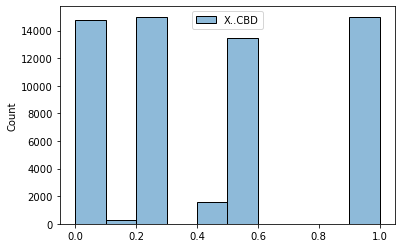

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_12713/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.023169809712946982

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.0064495189343450315

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08030889698125004

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.988677863984601

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9519926495388502

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.092495
1,lsa_1,0.089770
2,lsa_2,0.106595
3,lsa_3,0.192416
4,lsa_4,0.122720
...,...,...
81,tree,0.000492
82,tropical,0.000658
83,vanilla,0.007187
84,violet,0.001703


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
3,lsa_3,1.924165e-01
4,lsa_4,1.227202e-01
2,lsa_2,1.065946e-01
0,lsa_0,9.249500e-02
1,lsa_1,8.977029e-02
5,hybrid,4.026854e-02
77,sweet,2.981209e-02
7,sativa,2.603660e-02
68,pine,2.062614e-02
6,indica,1.910638e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([9.31351849e-02, 9.12631737e-02, 1.05379388e-01, 1.92743568e-01,
       1.20870802e-01, 3.93503003e-02, 1.88141980e-02, 2.89542593e-02,
       7.38167640e-05, 1.73668561e-03, 6.02186526e-03, 0.00000000e+00,
       9.35434529e-03, 6.18101123e-05, 5.70195402e-03, 5.49374999e-03,
       7.20344313e-03, 1.01880011e-02, 2.02525708e-05, 1.75181628e-02,
       1.22218569e-05, 0.00000000e+00, 4.05570961e-03, 6.82641653e-03,
       1.71667151e-02, 2.65753892e-03, 7.05353349e-03, 5.71538707e-05,
       1.24260997e-05, 3.56949991e-03, 1.16184635e-02, 0.00000000e+00,
       5.98546332e-03, 0.00000000e+00, 0.00000000e+00, 5.67172833e-03,
       5.66773812e-03, 5.56782902e-03, 7.36882774e-04, 2.67024858e-05,
       5.94926194e-05, 4.24419367e-03, 1.00785982e-04, 1.10628852e-02,
       1.00891628e-03, 3.32367898e-03, 1.03105308e-03, 4.31871550e-04,
       8.16857619e-03, 8.27638979e-04, 1.05055153e-02, 6.64501335e-03,
       1.89174025e-03, 5.23437416e-04, 4.67864393e-03, 9.33856099e-04,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,euphoric,happy,pine,sweet
0,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,1,0,0
1,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,1,0,0,0
2,0.341098,0.000528,-0.119240,-0.097021,-0.078687,1,0,0,0,1,0,0
3,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,1,0,0
4,0.173992,-0.041743,-0.059563,-0.156775,0.110850,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,1,1,0,0
59996,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,0,0,0
59997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,1,1,0,0
59998,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_cbd.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_cbd.pkl")

['selected_X_rf_lsa_elbow_cbd.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_12713/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02473289090012044

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.007688954120854213

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08768668154773684

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9859582453237745

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9427574029486567

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_cbd.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_cbd.pkl")

['rscv_rf_lsa_elbow_best_params_cbd.pkl']

RF (after Hyperparameter Tuning)

In [43]:
rfreg_ht = RandomForestRegressor(n_estimators = 500, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_12713/2121118255.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [44]:
mean_absolute_error(y_val, y_pred_rfreg)

0.023403570153348287

In [45]:
mean_squared_error(y_val, y_pred_rfreg)

0.005939930475417942

In [46]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07707094443055659

In [47]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9878577816525351

In [48]:
#val
r2_score(y_val, y_pred_rfreg)

0.9557785049340926

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [49]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [50]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_cbd.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_cbd.pkl")

['y_test_rfreg_lsa_elbow_cbd.pkl']

In [51]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.02204360667291327

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.005256784860320454

In [53]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.07250368859803241

In [54]:
r2_score(y_test, y_pred_rfreg_test)

0.9604191379490077

Error analysis

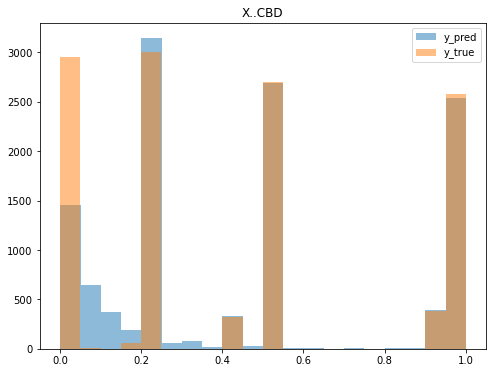

<Figure size 432x288 with 0 Axes>

In [55]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBD"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_cbd.png')

Pearson R

In [56]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.982
P-value: 0.000


<AxesSubplot:>

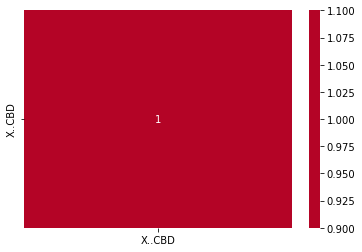

In [57]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)